# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [73]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=750)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=750)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 271


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [74]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=imperial&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city)
        city_weather = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais


Processing Record 2 of Set 1 | iskateley
Processing Record 3 of Set 1 | kerikeri
Processing Record 4 of Set 1 | lagoa
Processing Record 5 of Set 1 | qamdo
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | kyurdarmir
City not found. Skipping...
Processing Record 9 of Set 1 | kingston
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | bel ombre
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | san antonio de pale
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | tralee
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | badger
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | fort bragg
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 1 | georgetown
Processing Record 23 of Set 1 | akureyri
Processing Record 24 of Set 1 | suva
Processing R

In [75]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          256
Lat           256
Lng           256
Max Temp      256
Humidity      256
Cloudiness    256
Wind Speed    256
Country       256
Date          256
dtype: int64

In [76]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,43.63,97,100,33.87,TF,1699935861
1,iskateley,67.6803,53.1512,18.01,96,100,8.99,RU,1699935963
2,kerikeri,-35.2268,173.9474,57.72,87,100,9.06,NZ,1699935863
3,lagoa,39.0500,-27.9833,62.71,73,100,2.77,PT,1699935911
4,qamdo,31.1667,97.2333,34.56,31,36,6.20,CN,1699935865


In [77]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [78]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,43.63,97,100,33.87,TF,1699935861
1,iskateley,67.6803,53.1512,18.01,96,100,8.99,RU,1699935963
2,kerikeri,-35.2268,173.9474,57.72,87,100,9.06,NZ,1699935863
3,lagoa,39.0500,-27.9833,62.71,73,100,2.77,PT,1699935911
4,qamdo,31.1667,97.2333,34.56,31,36,6.20,CN,1699935865


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

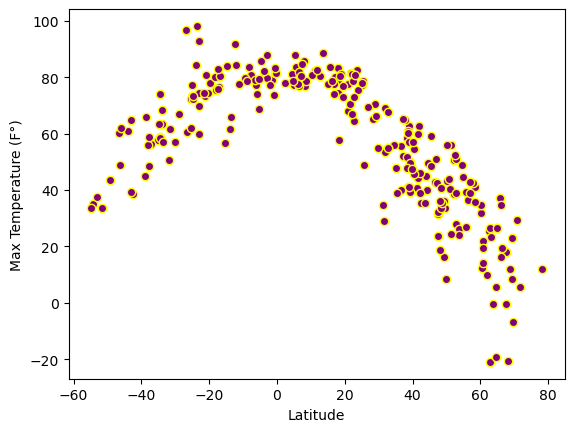

In [79]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x, y, edgecolor="yellow", color="purple")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F°)")

# Save the figure
plt.savefig("output_data/latvtemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

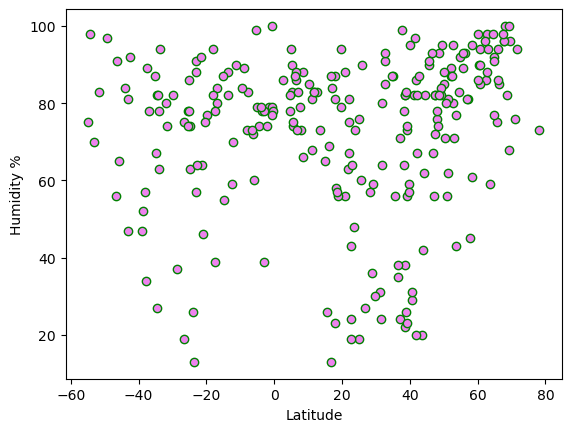

In [80]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x, y, edgecolor="green", color="violet")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Save the figure
plt.savefig("output_data/latvhumid.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

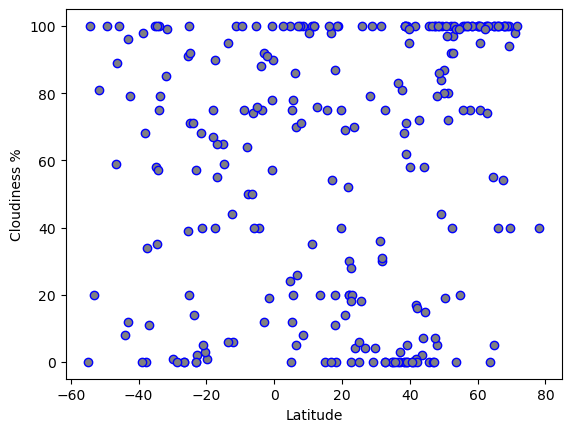

In [81]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x, y, edgecolor="blue", color="gray")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

# Save the figure
plt.savefig("output_data/latvcloudy.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

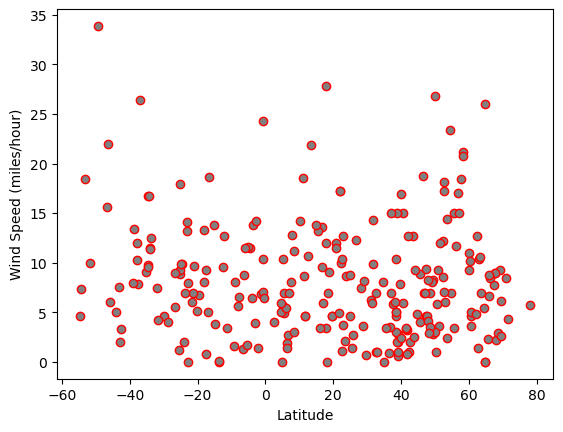

In [82]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x, y, edgecolor="red", color="gray")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (miles/hour)")

# Save the figure
plt.savefig("output_data/latvwind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [83]:
# Define a function to create Linear Regression plots

def Regression_scatter(weatherdata, xCol, yCol):
    x = weatherdata[xCol]
    y = weatherdata[yCol]

    correlation = st.pearsonr(x,y)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regression = x * slope + intercept
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(min(x), max(y), line_eq, color="green", fontsize=12)
    print(f"The r-value is: {rvalue}.")

    plt.plot(x, regression, color="red", label=f'regression line: y = {slope:.2f}x + {intercept:.2f}')
    plt.scatter(x, y)
    plt.xlabel("Latitude", fontsize=10)
    plt.ylabel("Max Temperature (F°)", fontsize=10)

plt.show()

In [84]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.copy()
northern_hemi_df = northern_hemi_df.loc[northern_hemi_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iskateley,67.6803,53.1512,18.01,96,100,8.99,RU,1699935963
3,lagoa,39.0500,-27.9833,62.71,73,100,2.77,PT,1699935911
4,qamdo,31.1667,97.2333,34.56,31,36,6.20,CN,1699935865
5,ribeira grande,38.5167,-28.7000,60.78,82,100,5.01,PT,1699935936
6,stanley,54.8680,-1.6985,44.71,92,20,6.91,GB,1699935880


In [85]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.copy()
southern_hemi_df = southern_hemi_df.loc[southern_hemi_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,43.63,97,100,33.87,TF,1699935861
2,kerikeri,-35.2268,173.9474,57.72,87,100,9.06,NZ,1699935863
8,grytviken,-54.2811,-36.5092,34.99,98,100,7.40,GS,1699935866
9,bel ombre,-4.6167,55.4167,85.84,74,40,11.50,SC,1699936025
10,adamstown,-25.0660,-130.1015,73.29,86,100,17.94,PN,1699935860


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8919497932226134.
The r-value is: <function linregress at 0x000001E56CE91080>.


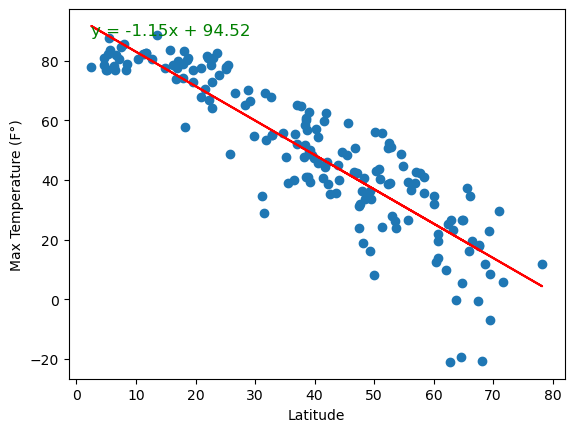

In [86]:
# Linear regression on Northern Hemisphere
Regression_scatter(northern_hemi_df, "Lat", "Max Temp")
print(f"The r-value is: {linregress}.")
plt.show()

The r-value is: 0.7732922007762295.
The r-value is: <function linregress at 0x000001E56CE91080>.


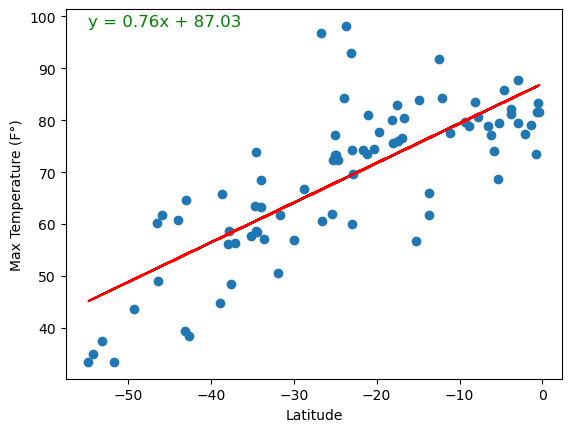

In [87]:
# Linear regression on Southern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Max Temp")
print(f"The r-value is: {linregress}.")
plt.show()

**Discussion about the linear relationship:** Since the Pearson's correlation is greater than 0.7 for both hemispheres, the correlation between the maximum temperature and latitude is strong. The linear relationship indicates the closer one is to the equator, the higher the maximum temperature. The closer one is to the North and South Poles, the temperature drops. There's a positive correlation between temp and latitude in the southern hemisphere and negative correlation in the northern. I prefer somewhere between 10 to 30° North or -10 to -30° South.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2474038858287185.
The r-value is: <function linregress at 0x000001E56CE91080>


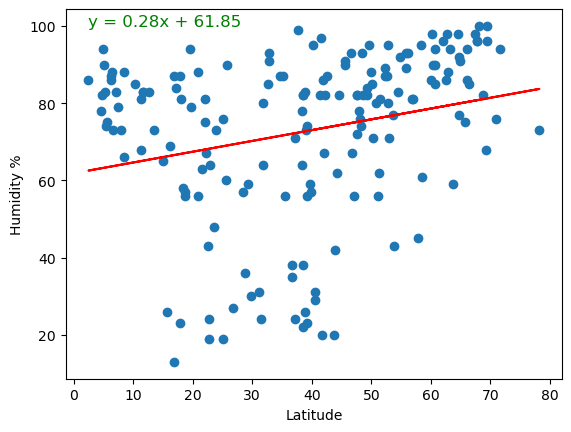

In [103]:
# Northern Hemisphere
Regression_scatter(northern_hemi_df, "Lat", "Humidity")
plt.ylabel("Humidity %", fontsize=10)
print(f"The r-value is: {linregress}")
plt.show()

The r-value is: 0.07512425147694676.
The r-value is: <function linregress at 0x000001E56CE91080>


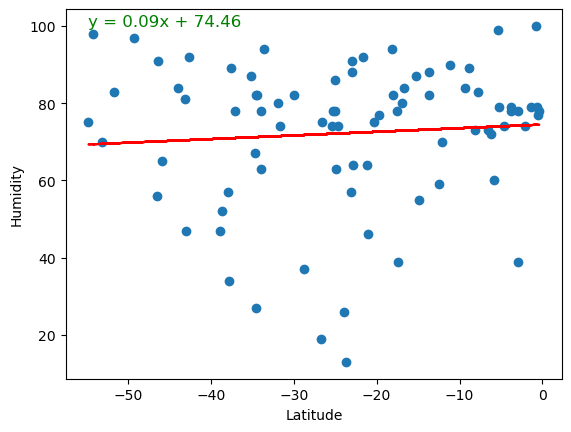

In [95]:
# Southern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Humidity")
plt.ylabel("Humidity %", fontsize=10)
print(f"The r-value is: {linregress}")
plt.show()

**Discussion about the linear relationship:** Since the Pearson's correlation is less than 0.3 for both hemispheres, the correlation between the humidity and latitude is very weak. There is very little correlation between humidity and latitude, however, the correlation is higher in the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.265847807079485.
The r-value is: <function linregress at 0x000001E56CE91080>


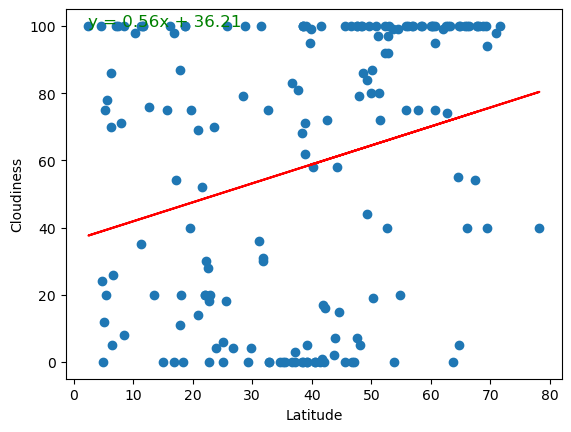

In [96]:
# Northern Hemisphere
Regression_scatter(northern_hemi_df, "Lat", "Cloudiness")
plt.ylabel("Cloudiness %", fontsize=10)
print(f"The r-value is: {linregress}")
plt.show()

The r-value is: 0.0727400123161274.
The r-value is: <function linregress at 0x000001E56CE91080>


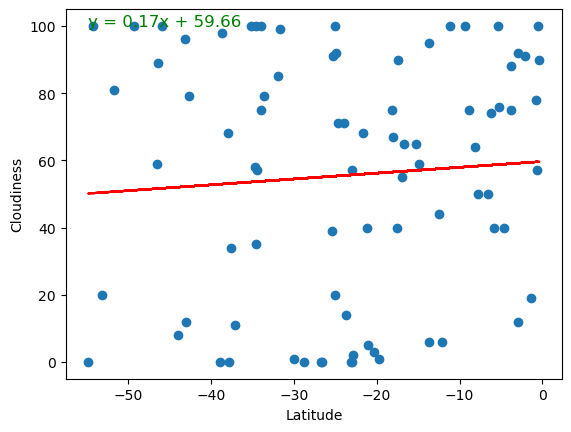

In [97]:
# Southern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Cloudiness")
plt.ylabel("Cloudiness %", fontsize=10)
print(f"The r-value is: {linregress}")
plt.show()

**Discussion about the linear relationship:** Since the Pearson's correlation is less than 0.3 for both hemispheres, the correlation between the cloudiness and latitude is very weak. There is very little correlation between cloudiness and latitude, however, the correlation is higher in the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04024377463050135.
The r-value is: <function linregress at 0x000001E56CE91080>.


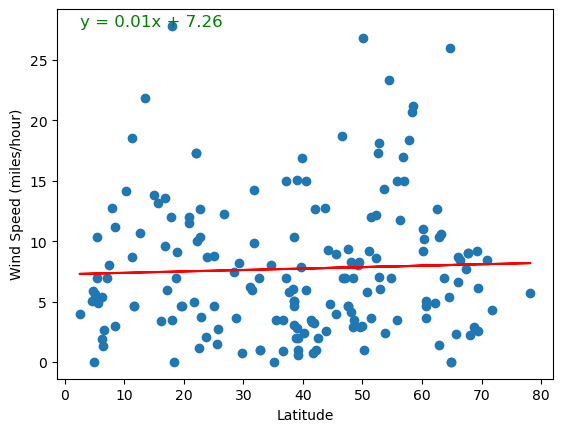

In [102]:
# Northern Hemisphere
Regression_scatter(northern_hemi_df, "Lat", "Wind Speed")
plt.ylabel("Wind Speed (miles/hour)", fontsize=10)
print(f"The r-value is: {linregress}.")
plt.show()

The r-value is: -0.2307767297079935.
The r-value is: <function linregress at 0x000001E56CE91080>.


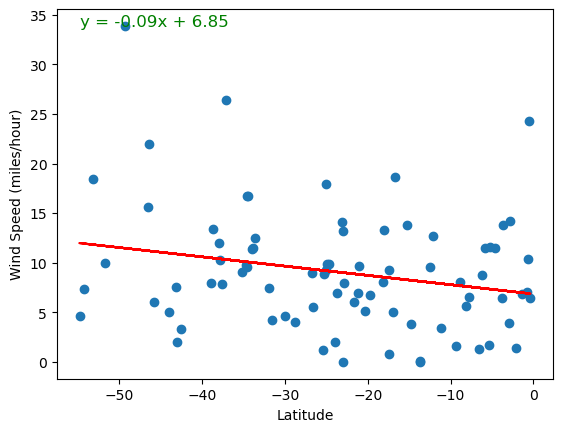

In [101]:
# Southern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Wind Speed")
plt.ylabel("Wind Speed (miles/hour)", fontsize=10)
print(f"The r-value is: {linregress}.")
plt.show()

**Discussion about the linear relationship:** Since the Pearson's correlation is less than 0.3 for both hemispheres, the correlation between wind speed and latitude is very weak. There is very little correlation between wind speed and latitude, however, the correlation is higher in the southern hemisphere.